[Reference](https://moez-62905.medium.com/top-automated-feature-engineering-frameworks-in-python-in-2022-9899d7b18f7e)

# Feature Tools

In [1]:
# install featuretools
!pip install featuretools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 362 kB 34.0 MB/s 
     |████████████████████████████████| 281 kB 54.6 MB/s 
     |████████████████████████████████| 207 kB 47.7 MB/s 
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [2]:
import featuretools as ft
data = ft.demo.load_mock_customer()
customers_df = data["customers"]
customers_df

/usr/local/lib/python3.7/dist-packages/woodwork/__init__.py:23: FutureWarning: Woodwork may not support Python 3.7 in next non-bugfix release.
  "Woodwork may not support Python 3.7 in next non-bugfix release.", FutureWarning
/usr/local/lib/python3.7/dist-packages/featuretools/__init__.py:67: FutureWarning: Featuretools may not support Python 3.7 in next non-bugfix release.
  FutureWarning,


,customer_id,zip_code,join_date,birthday
0,1,60091,2011-04-17 10:48:33,1994-07-18
1,2,13244,2012-04-15 23:31:04,1986-08-18
2,3,13244,2011-08-13 15:42:34,2003-11-21
3,4,60091,2011-04-08 20:08:14,2006-08-15
4,5,60091,2010-07-17 05:27:50,1984-07-28


In [3]:
sessions_df = data["sessions"]
sessions_df.sample(5)

,session_id,customer_id,device,session_start
13,14,1,tablet,2014-01-01 03:28:00
6,7,3,tablet,2014-01-01 01:39:40
1,2,5,mobile,2014-01-01 00:17:20
28,29,1,mobile,2014-01-01 07:10:05
24,25,3,desktop,2014-01-01 05:59:40


In [4]:
transactions_df = data["transactions"]
transactions_df.sample(5)

,transaction_id,session_id,transaction_time,product_id,amount
74,232,5,2014-01-01 01:20:10,1,139.20
231,27,17,2014-01-01 04:10:15,2,90.79
434,36,31,2014-01-01 07:50:10,3,62.35
420,56,30,2014-01-01 07:35:00,3,72.70
54,444,4,2014-01-01 00:58:30,4,43.59


In [5]:
dataframes = {
    "customers": (customers_df, "customer_id"),
    "sessions": (sessions_df, "session_id", "session_start"),
    "transactions": (transactions_df, "transaction_id", "transaction_time"),
}

In [6]:
relationships = [
    ("sessions", "session_id", "transactions", "session_id"),
    ("customers", "customer_id", "sessions", "customer_id"),
]

In [8]:
feature_matrix_customers, features_defs = ft.dfs(
    dataframes=dataframes,
    relationships=relationships,
    target_dataframe_name="customers",
)
feature_matrix_customers

,COUNT(sessions),MODE(sessions.device),NUM_UNIQUE(sessions.device),COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),MODE(transactions.product_id),NUM_UNIQUE(transactions.product_id),SKEW(transactions.amount),...,STD(sessions.SKEW(transactions.amount)),STD(sessions.SUM(transactions.amount)),SUM(sessions.MAX(transactions.amount)),SUM(sessions.MEAN(transactions.amount)),SUM(sessions.MIN(transactions.amount)),SUM(sessions.NUM_UNIQUE(transactions.product_id)),SUM(sessions.SKEW(transactions.amount)),SUM(sessions.STD(transactions.amount)),MODE(transactions.sessions.device),NUM_UNIQUE(transactions.sessions.device)
customer_id,,,,,,,,,,,,,,,,,,,,,
1,8,mobile,3,126,139.43,71.631905,5.81,4,5,0.019698,...,0.589386,279.510713,1057.97,582.193117,78.59,40.0,-0.476122,312.745952,mobile,3
2,7,desktop,3,93,146.81,77.422366,8.73,4,5,0.098259,...,0.509798,251.609234,931.63,548.905851,154.60,35.0,-0.277640,258.700528,desktop,3
3,6,desktop,3,93,149.15,67.060430,5.89,1,5,0.418230,...,0.429374,219.021420,847.63,405.237462,66.21,29.0,2.286086,257.299895,desktop,3
4,8,mobile,3,109,149.95,80.070459,5.73,2,5,-0.036348,...,0.387884,235.992478,1157.99,649.657515,131.51,37.0,0.002764,356.125829,mobile,3
5,6,mobile,3,79,149.02,80.375443,7.55,5,5,-0.025941,...,0.415426,402.775486,839.76,472.231119,86.49,30.0,0.014384,259.873954,mobile,3


In [9]:
feature_matrix_sessions, features_defs = ft.dfs( dataframes=dataframes, relationships=relationships, target_dataframe_name="sessions")
feature_matrix_sessions.head(5)

/usr/local/lib/python3.7/dist-packages/featuretools/entityset/entityset.py:749: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index
  + ", ".join(extra_params)
/usr/local/lib/python3.7/dist-packages/featuretools/entityset/entityset.py:749: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index, time_index
  + ", ".join(extra_params)


,customer_id,device,COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),MODE(transactions.product_id),NUM_UNIQUE(transactions.product_id),SKEW(transactions.amount),STD(transactions.amount),...,customers.STD(transactions.amount),customers.SUM(transactions.amount),customers.DAY(birthday),customers.DAY(join_date),customers.MONTH(birthday),customers.MONTH(join_date),customers.WEEKDAY(birthday),customers.WEEKDAY(join_date),customers.YEAR(birthday),customers.YEAR(join_date)
session_id,,,,,,,,,,,,,,,,,,,,,
1,2,desktop,16,141.66,76.813125,20.91,3,5,0.295458,41.600976,...,37.705178,7200.28,18,15,8,4,0,6,1986,2012
2,5,mobile,10,135.25,74.696000,9.32,5,5,-0.160550,45.893591,...,44.095630,6349.66,28,17,7,7,5,5,1984,2010
3,4,mobile,15,147.73,88.600000,8.70,1,5,-0.324012,46.240016,...,45.068765,8727.68,15,8,8,4,1,4,2006,2011
4,1,mobile,25,129.00,64.557200,6.29,5,5,0.234349,40.187205,...,40.442059,9025.62,18,17,7,4,0,6,1994,2011
5,4,mobile,11,139.20,70.638182,7.43,5,5,0.336381,48.918663,...,45.068765,8727.68,15,8,8,4,1,4,2006,2011


In [10]:
feature = features_defs[18]
feature

<Feature: MODE(transactions.YEAR(transaction_time))>

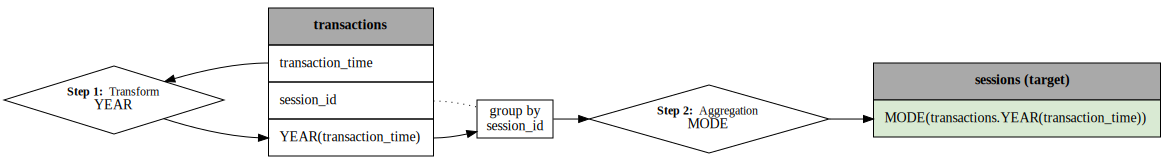

In [11]:
ft.graph_feature(feature)

# TSFresh

TSFresh is an open-source Python library. It combines well-known algorithms from statistics, time-series analysis, signal processing, and nonlinear dynamics with a reliable feature selection approach to give systematic time-series feature extraction. In this context, the term “time-series” is used in the broadest sense imaginable, making it feasible to characterize any forms of sampled data or even event sequences.

# Featurewiz
Featurewiz is an open-source python library that is an efficient and fast way to find out important feature from the dataset.

# PyCaret

In [13]:
# # install pycaret
# !pip install pycaret
# # load dataset
# from pycaret.datasets import get_data
# insurance = get_data('insurance')
# # init setup
# from pycaret.regression import *
# reg1 = setup(data = insurance, target = 'charges', feature_interaction = True, feature_ratio = True)